<a href="https://www.kaggle.com/code/subhajeetdas/netflix-stock-price-prediction?scriptVersionId=126308903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [4]:
viz = df.copy()

# Data Preparation

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(1009, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
test_pred = test.copy()

In [11]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
552,2020-04-16,437.000000,449.519989,431.609985,439.170013,439.170013,16128700
378,2019-08-07,302.559998,305.000000,296.809998,304.290009,304.290009,9322400
373,2019-07-31,325.160004,331.769989,318.529999,322.989990,322.989990,6259500
232,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200
316,2019-05-09,360.899994,364.200012,352.750000,362.750000,362.750000,5882600
526,2020-03-10,356.429993,364.540009,347.850006,364.130005,364.130005,7604400
688,2020-10-28,486.359985,494.000000,483.279999,486.239990,486.239990,5992700
309,2019-04-30,369.559998,374.500000,368.350006,370.540009,370.540009,3870100
801,2021-04-13,557.000000,559.750000,550.299988,553.729980,553.729980,2720300
446,2019-11-12,295.320007,295.350006,288.700012,292.010010,292.010010,5772800


In [12]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
481,2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
317,2019-05-10,361.619995,365.260010,353.059998,361.040009,361.040009,5657100
380,2019-08-09,313.739990,316.640015,305.679993,308.929993,308.929993,5349100
187,2018-10-31,297.769989,311.500000,295.049988,301.779999,301.779999,20360300
80,2018-05-31,353.799988,355.529999,350.209991,351.600006,351.600006,6921700
338,2019-06-11,355.000000,357.579987,348.500000,351.269989,351.269989,5396700
36,2018-03-28,298.390015,298.799988,281.609985,285.769989,285.769989,18972900
608,2020-07-07,497.309998,504.820007,490.829987,493.160004,493.160004,5669900
436,2019-10-29,281.869995,284.410004,277.549988,281.209991,281.209991,4356200
163,2018-09-27,379.869995,383.200012,376.000000,380.709991,380.709991,7326200


In [13]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [14]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [15]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = model_lnr.predict(x_test)

In [17]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.46954545]


# Model Evaluation

In [18]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 15.204
RMSE 3.899
MAE 2.796
MAPE 0.007
R2 Score :  0.999


# Model Visualization

In [19]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [20]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [21]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


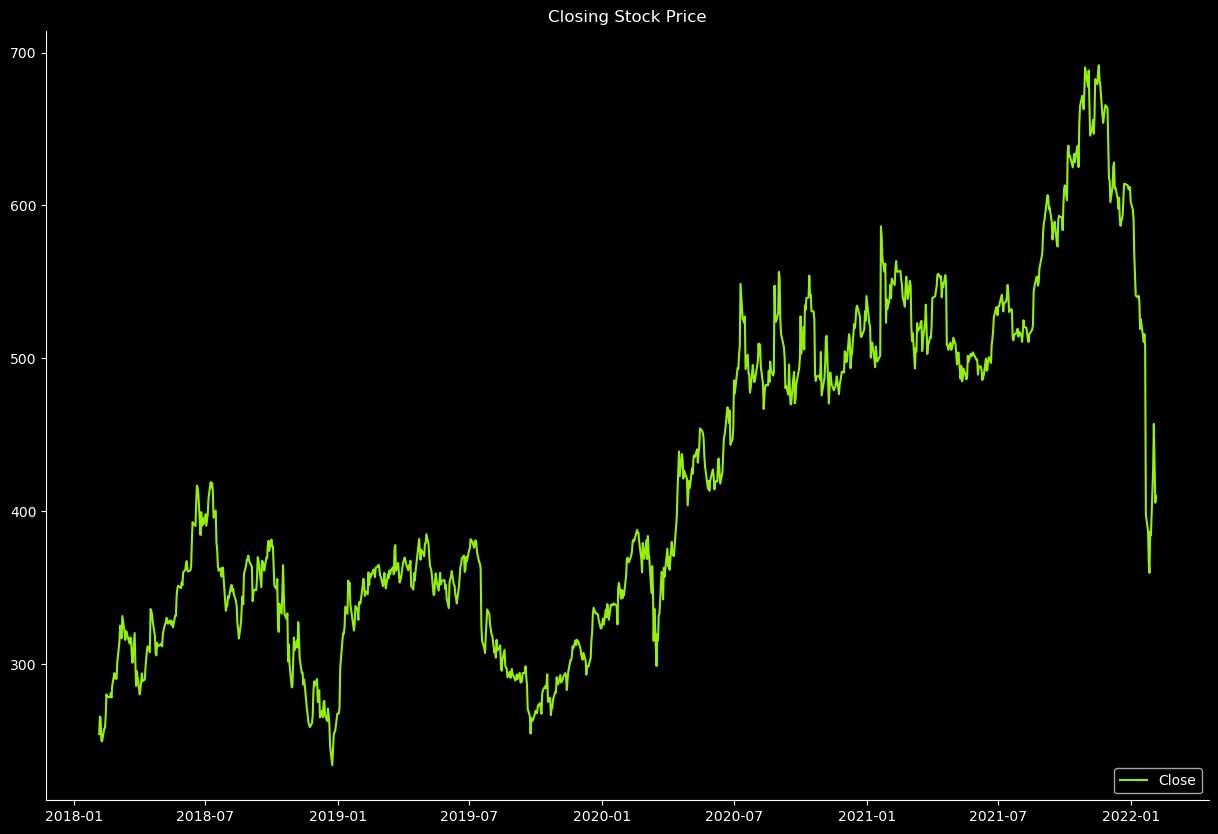

In [22]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

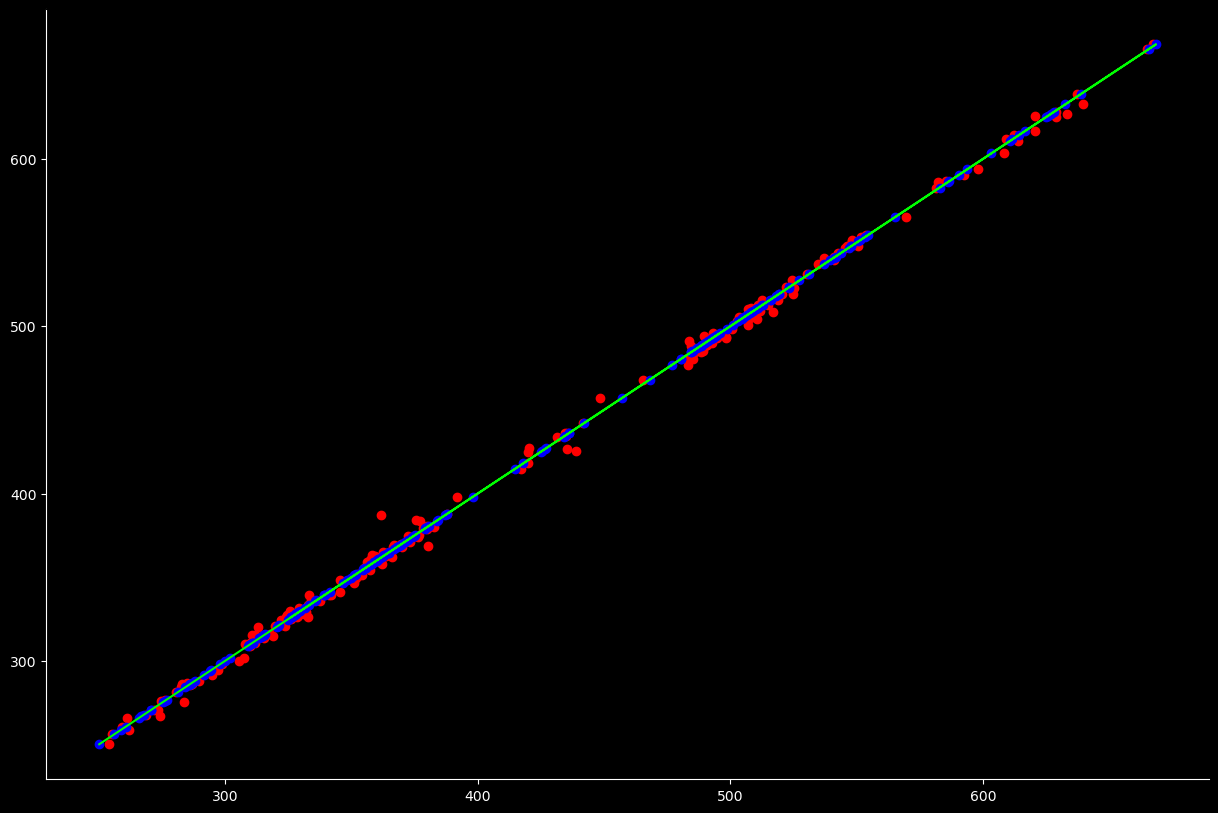

In [23]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [24]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
481,2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,328.494191
317,2019-05-10,361.619995,365.260010,353.059998,361.040009,361.040009,5657100,357.855884
380,2019-08-09,313.739990,316.640015,305.679993,308.929993,308.929993,5349100,309.755300
187,2018-10-31,297.769989,311.500000,295.049988,301.779999,301.779999,20360300,307.546707
80,2018-05-31,353.799988,355.529999,350.209991,351.600006,351.600006,6921700,352.748766
...,...,...,...,...,...,...,...,...
594,2020-06-16,425.760010,437.959991,425.179993,436.130005,436.130005,5507900,435.294665
311,2019-05-02,378.000000,383.500000,374.510010,379.059998,379.059998,5398200,379.879052
511,2020-02-18,379.299988,389.540009,379.190002,387.779999,387.779999,5173900,387.642985
241,2019-01-22,334.890015,336.880005,321.029999,325.160004,325.160004,17941400,326.208392


In [25]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,414.571931,105.901152,250.100006,326.877510,373.205002,504.130005,668.520020
Close_Prediction,202.0,414.833507,106.058911,253.997856,328.390175,373.044502,506.096626,667.374172


**Actual Close Price vs. Predicted Close Price**
<div class="flourish-embed flourish-chart" data-src="visualisation/13412598"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Saving the Data as CSV

In [26]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [27]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-06,265.720001,261.042885
2018-02-07,NaN,NaN
2018-02-08,250.100006,253.997856
2018-02-09,NaN,NaN
2018-02-10,NaN,NaN
...,...,...
2022-01-28,384.359985,375.708267
2022-01-29,NaN,NaN
2022-01-30,NaN,NaN


In [28]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em><br>
<br>    
<p style="text-align:center"><img src="https://allfreethankyounotes.com/wp-content/uploads/2021/01/all-free-thank-you-gif-3.gif" width="480" height="373"></p>